In [1]:
import sys
import csv
from scipy import stats
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data_result/Merged.csv')
data = data.reindex(np.random.permutation(data.index))
train = data[0:150]
valid = data[151::]

### Let's first do a simple regression

In [3]:
formstr='avg_score ~ bar_score+rest_score+num_complaints+num_restaurants+num_violations+num_Cviolations'
lm = smf.ols(formula=formstr, data = train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              avg_score   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.223
Date:                Tue, 10 Nov 2015   Prob (F-statistic):             0.0442
Time:                        13:20:48   Log-Likelihood:                -370.74
No. Observations:                 150   AIC:                             755.5
Df Residuals:                     143   BIC:                             776.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          14.3876      5.849      2.460      0.015         2.826    25.949
bar_score           0.0818      1.316      0.062      0.951        -2.520     2.684
rest_score         -0.0131      1.827     -0.007      0.994        -3.625     3.599
num_complaints      0.0036      0.003      1.131      0.260        -0.003     0.010
num_restaurants    -0.0372      0.020     -1.882      0.062        -0.076     0.002
num_violations      0.0014      0.004      0.352      0.725        -0.006     0.009
num_Cviolations     0.0007      0.006      0.125      0.900        -0.011     0.012
==============================================================================
Omnibus:                       61.533   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.190
Skew:                          -1.451   Prob(JB):                     2.60e-58
Kurtosis:                       8.832   Cond. No.                     9.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
r2=[lm.rsquared]
lmy2 = lm.predict(valid)
R2v=1-sum(pow(lmy2-valid.avg_score,2))/sum(pow(valid.avg_score-mean(valid.avg_score),2))
print('Validation R2={0}'.format(R2v))

Validation R2=0.1784763454


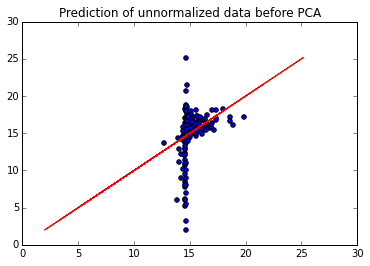

In [5]:
#plt.scatter(lm.predict(valid),valid.avg_score)
#plt.plot(valid.avg_score,valid.avg_score,'r')
plt.scatter(lm.predict(data),data.avg_score)
plt.plot(data.avg_score,data.avg_score,'r')
plt.title('Prediction of unnormalized data before PCA')

### Our prediction was really week because the data aren't normalized
### Now let's normalize the number of complaints, violations and critical violations by the number of restaurants in each zip code, resulting in complaints rate, violations rate and critical violations rate for restaurants in each zip code.

In [6]:
data['comp_per_rest'] = data['num_complaints']/data['num_restaurants']
data['vio_per_rest'] = data['num_violations']/data['num_restaurants']
data['Cvio_per_rest'] = data['num_Cviolations']/data['num_restaurants']
train1 = data[0:150]
valid1 = data[151::]

### After testing, we find out that the violations rate doesn't matter as much as the critical violations rate, so we choose to drop that.

In [7]:
formstr1='avg_score ~ bar_score+rest_score+comp_per_rest+Cvio_per_rest'
#formstr1='avg_score ~ rest_score+comp_per_rest+Cvio_per_rest'
lm1 = smf.ols(formula=formstr1, data = train1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              avg_score   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 10 Nov 2015   Prob (F-statistic):           4.66e-45
Time:                        13:20:53   Log-Likelihood:                -267.66
No. Observations:                 150   AIC:                             545.3
Df Residuals:                     145   BIC:                             560.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        10.1688      2.652      3.834      0.000         4.927    15.411
bar_score         0.5499      0.653      0.842      0.401        -0.741     1.841
rest_score       -1.2294      0.904     -1.360      0.176        -3.016     0.558
comp_per_rest     0.1594      0.121      1.314      0.191        -0.080     0.399
Cvio_per_rest     0.7708      0.040     19.110      0.000         0.691     0.851
==============================================================================
Omnibus:                       20.928   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.843
Skew:                          -0.129   Prob(JB):                     4.66e-23
Kurtosis:                       7.048   Cond. No.                         274.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
r2=[lm1.rsquared]
lmy2 = lm1.predict(valid1)
R2v=1-sum(pow(lmy2-valid1.avg_score,2))/sum(pow(valid1.avg_score-mean(valid1.avg_score),2))
print('Validation R2={0}'.format(R2v))

Validation R2=0.767168361623


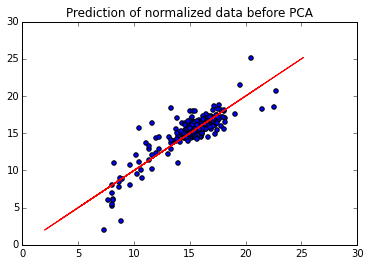

In [9]:
#plt.scatter(lm1.predict(valid1),valid1.avg_score)
#plt.plot(valid1.avg_score,valid1.avg_score,'r')
plt.scatter(lm1.predict(data),data.avg_score)
plt.plot(data.avg_score,data.avg_score,'r')
plt.title('Prediction of normalized data before PCA')

### There's significant improvement on the performance of the model after normalization
### Now let's do a PCA for the unnormalized data and compare to our custom approach

In [10]:
Y = np.matrix(data.avg_score)
#X = np.matrix(data[['bar_score','rest_score','comp_per_rest','Cvio_per_rest']])
X = np.matrix(data[['bar_score','rest_score','num_complaints','num_restaurants','num_violations','num_Cviolations']])
m=mean(X,0)
s=std(X,0)
X1=1.0*np.array(X)
for i in xrange(0,6):
    X1[:,i]=(X1[:,i]-m[0,i])/s[0,i]
U, s, Vt = np.linalg.svd(X1) #singular value decomposition
V = Vt.T
#sort singular values
ind = np.argsort(s)[::-1] 
U = U[:, ind]
s = s[ind]
V = V[:, ind]
S = np.diag(s)
P=X1*np.matrix(V)
sc=cumsum(s**2/sum(s**2))

In [11]:
lmData=pd.DataFrame(P[:,:])
lmData.columns=['P1','P2','P3','P4','P5','P6']
lmData['Y']=Y.transpose()
lm_pca = smf.ols(formula='Y ~ P1+P2+P3+P4+P5+P6',data=lmData).fit()
lm_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.079
Date:                Tue, 10 Nov 2015   Prob (F-statistic):           6.63e-05
Time:                        13:21:22   Log-Likelihood:                -548.51
No. Observations:                 228   AIC:                             1111.
Df Residuals:                     221   BIC:                             1135.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.0825      0.180     83.579      0.000        14.727    15.438
P1            -0.3646      0.085     -4.300      0.000        -0.532    -0.198
P2             0.0136      0.172      0.079      0.937        -0.325     0.352
P3            -0.1445      0.338     -0.428      0.669        -0.811     0.522
P4             0.9972      0.668      1.493      0.137        -0.319     2.313
P5            -5.5073      1.794     -3.069      0.002        -9.044    -1.971
P6            -3.6831      9.597     -0.384      0.702       -22.597    15.231
==============================================================================
Omnibus:                       78.084   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.703
Skew:                          -1.313   Prob(JB):                     1.27e-73
Kurtosis:                       8.333   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
R2_pca = lm_pca.rsquared
print('R2_PCA={0}'.format(R2_pca))

R2_PCA=0.121183714935


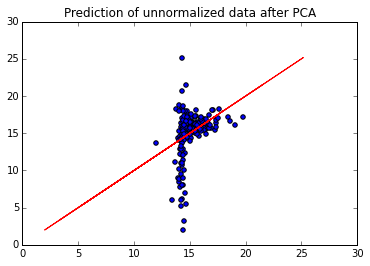

In [13]:
plt.scatter(lm_pca.predict(lmData),lmData.Y)
plt.plot(lmData.Y,lmData.Y,'r')
plt.title('Prediction of unnormalized data after PCA')

### The result turns out to be not as good as what we may expect. Now let's drop the two weakest regressors and see if the regression fits better

In [14]:
lm_pca = smf.ols(formula='Y ~ P1+P4+P5+P6',data=lmData).fit()
lm_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7.633
Date:                Tue, 10 Nov 2015   Prob (F-statistic):           8.82e-06
Time:                        13:21:29   Log-Likelihood:                -548.61
No. Observations:                 228   AIC:                             1107.
Df Residuals:                     223   BIC:                             1124.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.0825      0.180     83.920      0.000        14.728    15.437
P1            -0.3646      0.084     -4.317      0.000        -0.531    -0.198
P4             0.9972      0.665      1.499      0.135        -0.314     2.308
P5            -5.5073      1.787     -3.082      0.002        -9.029    -1.985
P6            -3.6831      9.558     -0.385      0.700       -22.519    15.153
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.697
Skew:                          -1.308   Prob(JB):                     2.10e-73
Kurtosis:                       8.328   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
R2_pca = lm_pca.rsquared
print('R2_PCA={0}'.format(R2_pca))

R2_PCA=0.120431736342


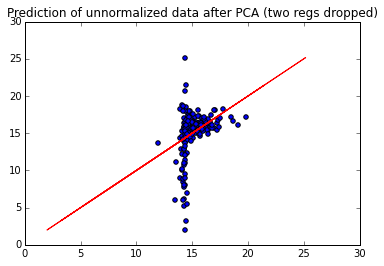

In [16]:
plt.scatter(lm_pca.predict(lmData),lmData.Y)
plt.plot(lmData.Y,lmData.Y,'r')
plt.title('Prediction of unnormalized data after PCA (two regs dropped)')

### The result didn't change that much. Therefore, it is safe to conclude that our custom approach works better than a simple PCA of the unnormalized data.
### Now let's do a PCA for the normalized data and see if there's more room for improvement

In [17]:
Y = np.matrix(data.avg_score)
X = np.matrix(data[['bar_score','rest_score','comp_per_rest','Cvio_per_rest']])
m=mean(X,0)
s=std(X,0)
X1=1.0*np.array(X)
for i in xrange(0,4):
    X1[:,i]=(X1[:,i]-m[0,i])/s[0,i]
U, s, Vt = np.linalg.svd(X1) #singular value decomposition
V = Vt.T
#sort singular values
ind = np.argsort(s)[::-1] 
U = U[:, ind]
s = s[ind]
V = V[:, ind]
S = np.diag(s)
P=X1*np.matrix(V)
sc=cumsum(s**2/sum(s**2))

In [18]:
lmData=pd.DataFrame(P[:,:])
lmData.columns=['P1','P2','P3','P4']
lmData['Y']=Y.transpose()
lm_pca = smf.ols(formula='Y ~ P1+P2+P3+P4',data=lmData).fit()
lm_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     184.9
Date:                Tue, 10 Nov 2015   Prob (F-statistic):           1.33e-69
Time:                        13:21:51   Log-Likelihood:                -396.53
No. Observations:                 228   AIC:                             803.1
Df Residuals:                     223   BIC:                             820.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.0825      0.092    163.514      0.000        14.901    15.264
P1            -1.0740      0.064    -16.704      0.000        -1.201    -0.947
P2            -1.5425      0.086    -17.869      0.000        -1.713    -1.372
P3             1.4957      0.128     11.660      0.000         1.243     1.749
P4             0.3973      0.173      2.292      0.023         0.056     0.739
==============================================================================
Omnibus:                       27.820   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.964
Skew:                           0.047   Prob(JB):                     1.36e-34
Kurtosis:                       7.051   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
R2_pca = lm_pca.rsquared
print('R2_PCA={0}'.format(R2_pca))

R2_PCA=0.768317684126


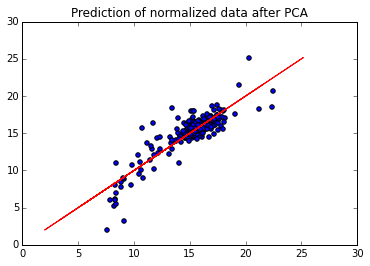

In [20]:
plt.scatter(lm_pca.predict(lmData),lmData.Y)
plt.plot(lmData.Y,lmData.Y,'r')
plt.title('Prediction of normalized data after PCA')

### PCA doesn't help as much for our normalized dataset. Then it's okay to conclude that our custom approach is appropriate.